#### Code From Previous Parts in PyTorch Workflow

In [47]:
import torch
from torch import nn

import matplotlib.pyplot as plt

In [48]:
# Data points imported from lesson 19

weight = 0.91
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
# parameters for creating the tensor: X

X = torch.arange(start, end, step).unsqueeze(dim = 1)
# adds an extra dimension so theres an extra square bracket and each element of X, y are on different lines in the output for betting viewing
y = weight * X + bias # is Linear Regression Formula


trainSplit = int(0.8 * len(X)) # creating the train split by multiplying the upper bounds of the train split by the length of X to get the total number

XTrain, yTrain = X[:trainSplit], y[:trainSplit] # indexing to get all samples up until the trainsplit
XTest, yTest = X[trainSplit:], y[trainSplit:] # indexing to get all the samples from the trainsplit onwards, or what is left over after the trainsplit

In [49]:
# using matplotlib to visualize the data points

def plotPredictions(trainData = XTrain, 
                    trainLabels = yTrain, 
                    testData = XTest, 
                    testLabels = yTest, 
                    prediction = None):
# Plots training data, test data and comparing predictions

    plt.figure(figsize = (10, 7)) 
    
    plt.scatter(trainData, trainLabels, c = "b", label = "Training Data")

    plt.scatter(testData, testLabels, c = "g", label = "Testing Data")

    if prediction is not None:
        plt.scatter(testData, prediction, c = "r", label = "Prediction")

    plt.legend(prop = {"size": 14})

In [50]:
# model imported from lesson 20

class LinearRegressionModel(nn.Module): # almost everything in Pytorch inherits from nn.Module, and can be considered the building blocks for pytorch
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True, # grad = True is set by default, one of the main algorithms for predictions
                                                dtype= torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad= True,
                                             dtype= torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor: # -> means the return value, very similar to java, but for python its included outside of the method
        # 'x' is the input data
        return self.weights * x + self.bias # linear regression formula

In [51]:
# code imported from lesson 22
# creating a random seed
torch.manual_seed(246)

# creating an instance of the model which is a subclass of nn.Module
model0 = LinearRegressionModel() # type: ignore

In [52]:
# Code imported from lesson 25

lossFunction = nn.L1Loss()

optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr= 0.01, # learning rate - is the most important hyperparameter that the programmer can set, the smaller the learning rate, the smaller the change
                                      # in the parameters, and the larger the learning rate, the larger the change of the parameters
                            )

In [54]:
# Training Loop

torch.manual_seed(42)

# an epoch is a loop through the data, and is a hyperparameter since we set it ourselves 
epochs = 1

# 1. Loop through the data (have to execute all the training loop steps in the for loop below
for epoch in range(epochs):
    # setting the model to training mode, which is the calling the function .train() on the model, in Pytorch train mode sets all parameters that need parameters to require parameters
    model0.train() # default mode/state of the model

    # 2. Forward Pass
    yPred = model0(XTrain) # learning patterns on the training data, and evaluating data on the test data, and uses the Forward method

    # 3. Calculating the Loss (Mean Absolute Error or MAE) or the distance from the test values(green dots), and the values that the model gave(red dots)
    loss = lossFunction(yPred, yTrain) # lossFunction = nn.L1Loss()
    print(f"loss:{loss}")

    # 4. Optimizer zero grad 
    optimizer.zero_grad() # optimizer = torch.optim.SGD(params=model0.parameters(),lr= 0.01,)

    # 5. Backpropagation with respect to the loss with the models parameters
    loss.backward()

    # 6. Optimizer step (perform the gradient descent), makes calculations in how the model should adjust the parameters based on the loss of the back propagation 
    optimizer.step() 
    # by default, the change of the optimizer will accumulate through the loop, so step 4 is imp
    # important to prevent the model from cycling different epochs, and .zero_grad will reset the epoch

    model0.eval() # turns off gradient tracking

    # printing out model state_dict()
    print(model0.state_dict())

loss:0.0049898698925971985
OrderedDict([('weights', tensor([0.9029])), ('bias', tensor([0.2962]))])


## Running Training Loop: Epoch By Epoch



In [43]:
weight, bias

(0.91, 0.3)

In [45]:
model0.state_dict()

# each time that the training loop is run, the loss is getting smaller and smaller, and consequently the model's parameters are getting closer and closer to the the bias and weight of the original function

OrderedDict([('weights', tensor([0.9029])), ('bias', tensor([0.2962]))])

In [46]:
with torch.inference_mode():
    yPredNew = model0(XTest)

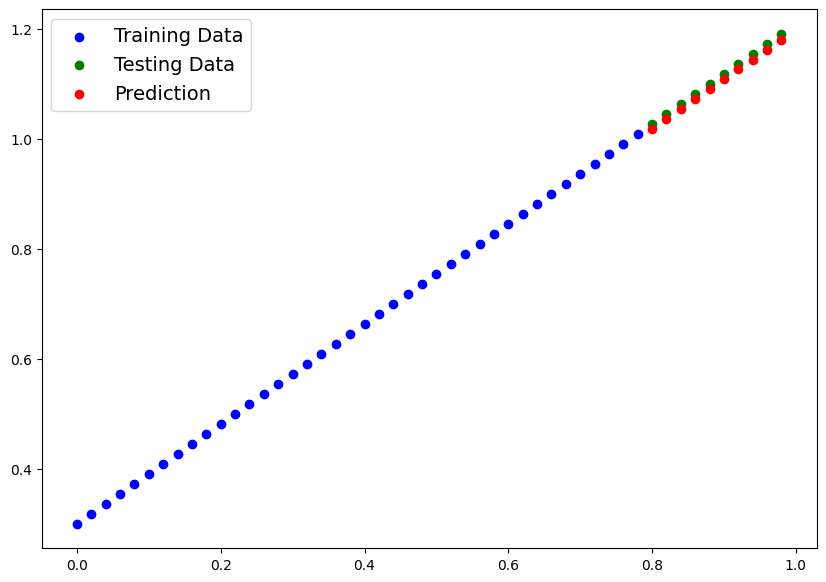

In [57]:
plotPredictions(prediction=yPredNew) # to use the matplotlib function, you have to call prediction = the new predictions that was called

# since i ran the code almost 10000 times, the predictions that the model gave is very similar to the testing data line